# NLP Part A

# **Install Required Libraries**

In [1]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install pdfplumber
!pip install PyPDF2
!pip install python-Levenshtein
!pip install nltk
!pip install gradio nltk textdistance
!pip install fuzzywuzzy
!pip install metaphone
!pip install pygtrie
!pip install faiss-cpu
!pip install --upgrade torch torchvision torchaudio
!pip install language_tool_python
!pip install gradio nltk language-tool-python
!pip install pyperclip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 64.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 91.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import re
import numpy as np
import joblib
import spacy
import pdfplumber
import PyPDF2
import gradio as gr
import nltk
import textdistance
import pandas as pd
import sys
import tkinter as tk
import pyperclip
import requests
import os
import random
import faiss
import matplotlib.pyplot as plt

from tkinter import messagebox, filedialog
from typing import List, Tuple, Dict
from collections import Counter,defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import word_tokenize
from nltk.util import bigrams, ngrams
from nltk.corpus import words, stopwords
from IPython.display import display
from textdistance import levenshtein
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from textdistance import levenshtein as edit_distance
from nltk.metrics import edit_distance
from fuzzywuzzy import fuzz
from metaphone import doublemetaphone
from rapidfuzz import fuzz
from transformers import pipeline
from pygtrie import Trie

In [3]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download("words")
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')
nltk.download('wordnet')
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


#**Importing Dataset**

##Load Dataset and Drop Unnecessary column

In [4]:
# Load the dataset
df = pd.read_csv('/content/abcnews-date-text.csv')

# Drop 'publish_date' column
df = df.drop(columns=['publish_date'])
df

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers
...,...
1244179,two aged care residents die as state records 2...
1244180,victoria records 5;919 new cases and seven deaths
1244181,wa delays adopting new close contact definition
1244182,western ringtail possums found badly dehydrate...


In [5]:
# Basic inspection
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Dataset shape: (1244184, 1)

First 5 rows:
                                       headline_text
0  aba decides against community broadcasting lic...
1     act fire witnesses must be aware of defamation
2     a g calls for infrastructure protection summit
3           air nz staff in aust strike for pay rise
4      air nz strike to affect australian travellers


## Data Checking

In [6]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
headline_text    0
dtype: int64


In [7]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244184 entries, 0 to 1244183
Data columns (total 1 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   headline_text  1244184 non-null  object
dtypes: object(1)
memory usage: 9.5+ MB
None


# **EDA Pre-Processing**

## Word Count, Sentence Count, Character Count, and Most Common Words

In [8]:
# Join all headlines into one string
text_string = ' '.join(df['headline_text'].astype(str))

# Total word count
word_list = text_string.split()
word_count = len(word_list)
print(f"Total Words: {word_count}")

Total Words: 8158765


In [9]:
# Sentence count (approximate using periods)
sentence_count = text_string.count(".")
print(f"Total Sentences: {sentence_count}")

Total Sentences: 975


In [10]:
# Character count
char_count = len(text_string)
print(f"Total Characters: {char_count}")

Total Characters: 52609746


In [11]:
# Most common words
common_words = Counter(word_list).most_common(20)
print("\nMost Common Words:")
for word, freq in common_words:
    print(f"{word}: {freq}")


Most Common Words:
to: 238375
in: 156175
for: 143272
of: 95940
on: 82014
the: 65048
over: 54527
police: 39813
at: 36887
with: 36331
after: 34641
new: 33729
a: 31148
man: 30627
and: 30069
as: 24333
says: 23731
from: 23440
up: 22872
by: 21375


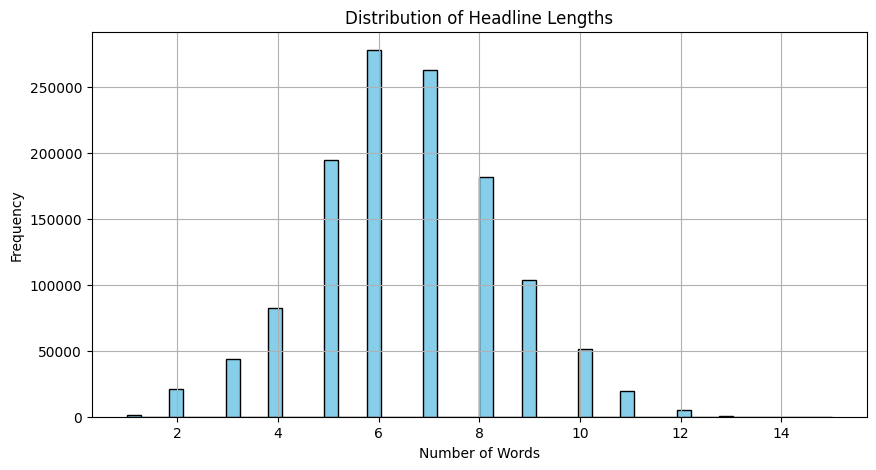

In [12]:
# Add a column for headline length
df['text_length'] = df['headline_text'].apply(lambda x: len(x.split()))

# Plot distribution
plt.figure(figsize=(10, 5))
plt.hist(df['text_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Headline Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##  Word Cloud

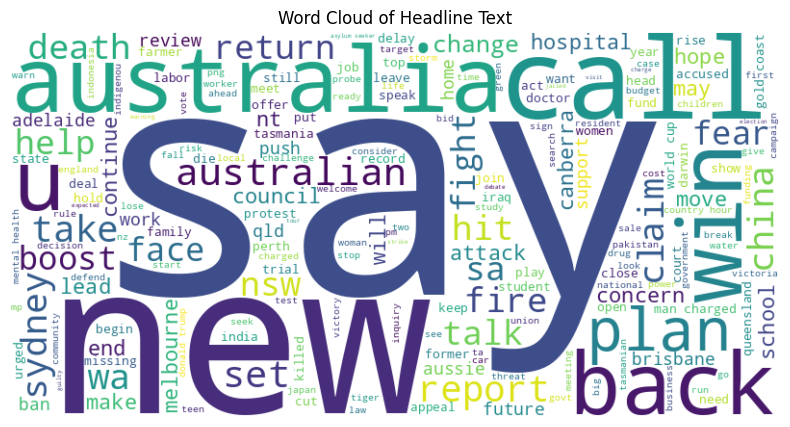

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text
text_string = ' '.join(df['headline_text'].astype(str))

# Generate and plot word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_string)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Headline Text")
plt.show()

## Sentence Length Distribution (approx. using periods)

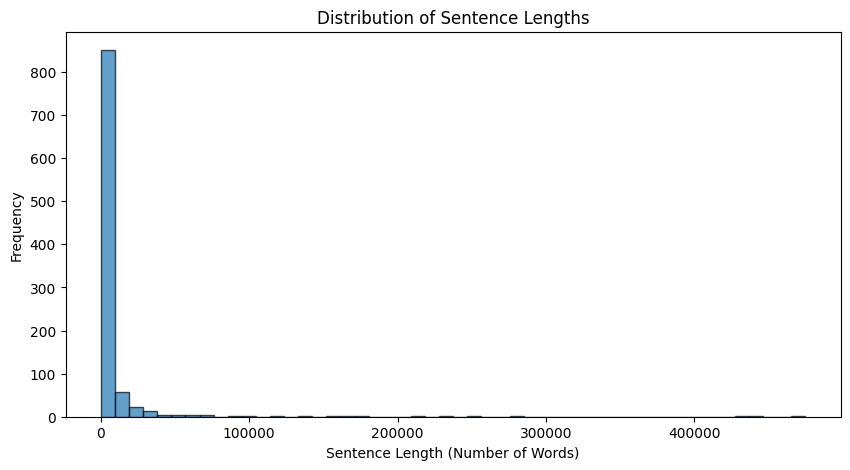

In [14]:
sentence_lengths = [len(sentence.split()) for sentence in text_string.split(".")]

plt.figure(figsize=(10, 5))
plt.hist(sentence_lengths, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel("Sentence Length (Number of Words)")
plt.ylabel("Frequency")
plt.title("Distribution of Sentence Lengths")
plt.show()

## Character Count per Sentence

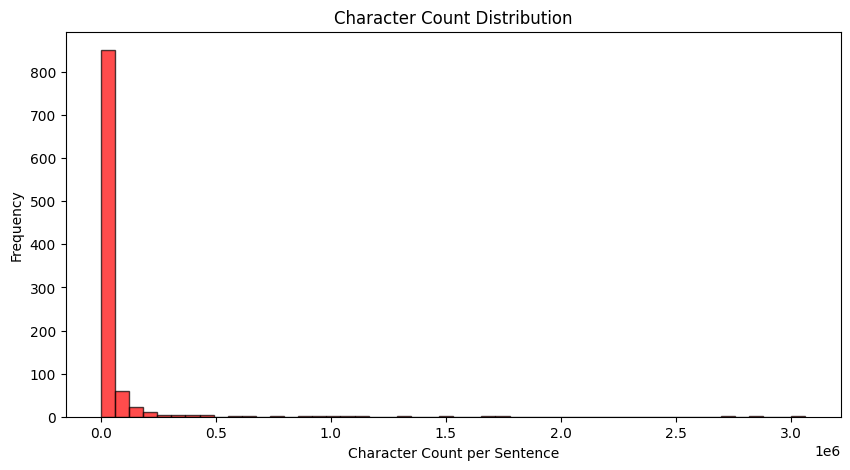

In [15]:
char_counts = [len(sentence) for sentence in text_string.split(".")]

plt.figure(figsize=(10, 5))
plt.hist(char_counts, bins=50, edgecolor='black', alpha=0.7, color='red')
plt.xlabel("Character Count per Sentence")
plt.ylabel("Frequency")
plt.title("Character Count Distribution")
plt.show()

## Word Length Distribution

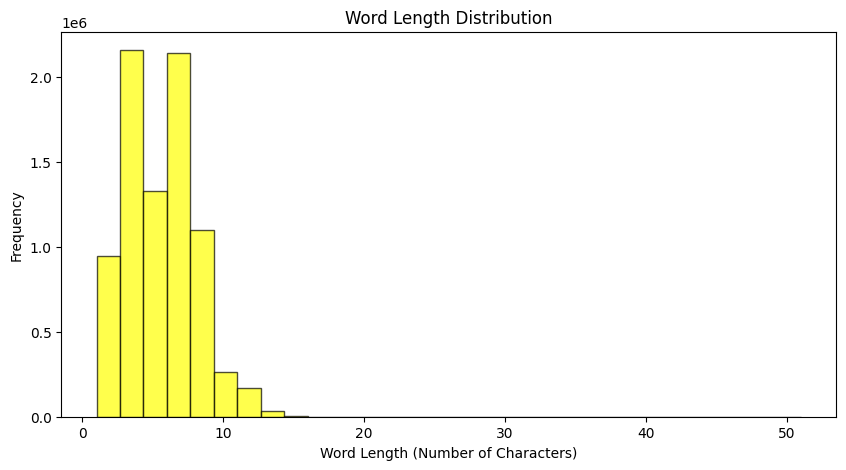

In [16]:
word_list = text_string.split()
word_lengths = [len(word) for word in word_list]

plt.figure(figsize=(10, 5))
plt.hist(word_lengths, bins=30, edgecolor='black', alpha=0.7, color='yellow')
plt.xlabel("Word Length (Number of Characters)")
plt.ylabel("Frequency")
plt.title("Word Length Distribution")
plt.show()

## Top Bigrams (Phrase Frequency)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

# Vectorize bigrams
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=50)
X_bigrams = bigram_vectorizer.fit_transform(df['headline_text'].astype(str))

# Get bigram frequencies
bigram_freq = X_bigrams.sum(axis=0).A1
bigram_names = bigram_vectorizer.get_feature_names_out()
bigram_counts = dict(zip(bigram_names, bigram_freq))

# Display top 20 bigrams
top_bigrams = Counter(bigram_counts).most_common(20)
print("Top Bigrams:")
for phrase, count in top_bigrams:
    print(f"{phrase}: {count}")

Top Bigrams:
to be: 10336
urged to: 7166
calls for: 6996
in the: 6040
on the: 5617
call for: 5528
killed in: 5528
of the: 5447
charged over: 5436
accused of: 5282
out of: 5178
set to: 4121
man charged: 3890
gold coast: 3643
charged with: 3494
to get: 3451
world cup: 3399
to the: 3307
to help: 3281
to face: 3204


## Stopword Frequency Analysis

In [18]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Count stopword frequency
stopword_counts = Counter(word for word in word_list if word.lower() in stop_words)
top_stopwords = stopword_counts.most_common(20)

# Print top stopwords
print("Top Stopwords:")
for word, count in top_stopwords:
    print(f"{word}: {count}")

Top Stopwords:
to: 238375
in: 156175
for: 143272
of: 95940
on: 82014
the: 65048
over: 54527
at: 36887
with: 36331
after: 34641
a: 31148
and: 30069
as: 24333
from: 23440
up: 22872
by: 21375
out: 19117
be: 18199
more: 16775
not: 15560


## Class Balance Plot (If labels exist)

In [19]:
df['label'] = df['headline_text'].apply(lambda x: 1 if len(x.split()) > 7 else 0)

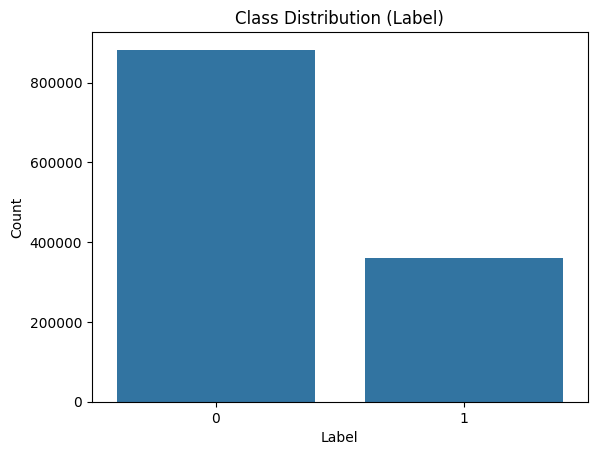

In [20]:
import seaborn as sns

# Plot class distribution
sns.countplot(x='label', data=df)
plt.title("Class Distribution (Label)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

# **Preprocessing**

In [21]:
import nltk
import re
from nltk.corpus import stopwords, words
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Downloads (run once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [22]:
# Load vocab and tools
english_vocab = set(words.words())
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [23]:
# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    tokens = [w for w in tokens if w in english_vocab and w not in stop_words]
    return ' '.join(sorted(set(tokens)))

In [24]:
# Apply to dataset
df['cleaned_text'] = df['headline_text'].apply(preprocess_text)

# Word count stats
all_words = ' '.join(df['cleaned_text']).split()
total_words = len(all_words)
unique_words = len(set(all_words))

print(f"Total Words: {total_words}")
print(f"Unique Words: {unique_words}")

Total Words: 5042126
Unique Words: 24305


In [25]:
# Preview
df[['headline_text', 'cleaned_text']].head()

,headline_text,cleaned_text
0,aba decides against community broadcasting lic...,aba community
1,act fire witnesses must be aware of defamation,act aware defamation fire must witness
2,a g calls for infrastructure protection summit,call g infrastructure protection summit
3,air nz staff in aust strike for pay rise,air pay rise staff strike
4,air nz strike to affect australian travellers,affect air strike traveller


In [26]:
df['label'] = df['cleaned_text'].apply(lambda x: 1 if len(x.split()) > 7 else 0)

In [27]:
# Save cleaned CSV
df.to_csv('/content/cleaned_abcnews.csv', index=False)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize cleaned text
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])

from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize cleaned text
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])


# **EDA preprocessed dataset**

## Most Frequent Words (Post-Cleaning)

In [29]:
from collections import Counter

all_words = ' '.join(df['cleaned_text']).split()
word_freq = Counter(all_words).most_common(20)

print("Most Common Words After Cleaning:")
for word, freq in word_freq:
    print(f"{word}: {freq}")

Most Common Words After Cleaning:
police: 39761
new: 33586
man: 31703
say: 28869
u: 20669
call: 19622
plan: 19466
council: 19337
court: 18534
fire: 18088
win: 16669
wa: 16510
interview: 16199
back: 16171
death: 15584
woman: 14225
crash: 14135
year: 13459
water: 13339
report: 13058


## Word Cloud (Preprocessed)

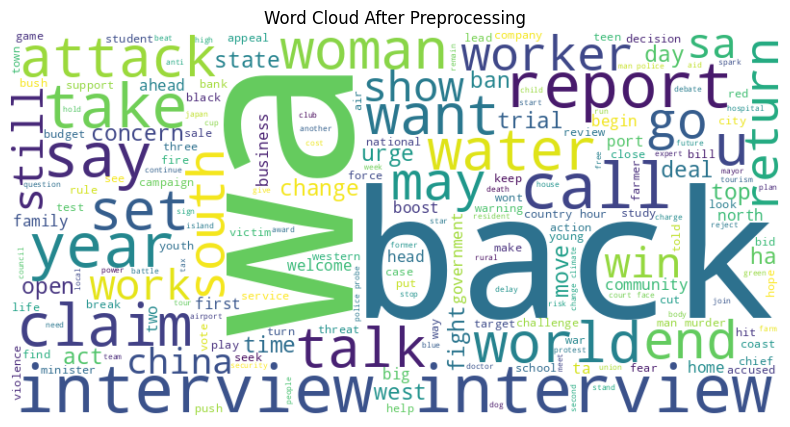

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud After Preprocessing')
plt.show()

## Word/Character Distribution

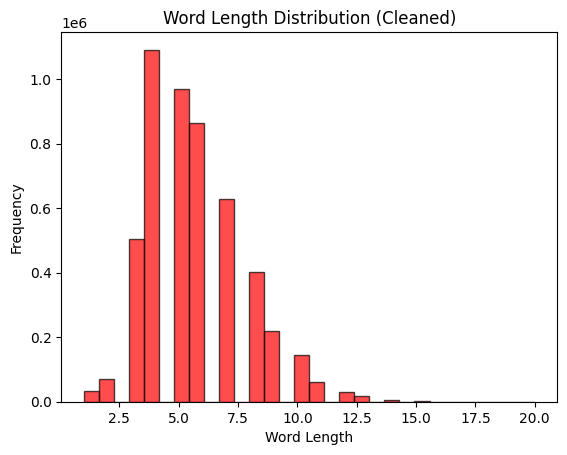

In [31]:
# Word length
word_lengths = [len(word) for word in all_words]

plt.hist(word_lengths, bins=30, edgecolor='black', color='red', alpha=0.7)
plt.xlabel("Word Length")
plt.ylabel("Frequency")
plt.title("Word Length Distribution (Cleaned)")
plt.show()

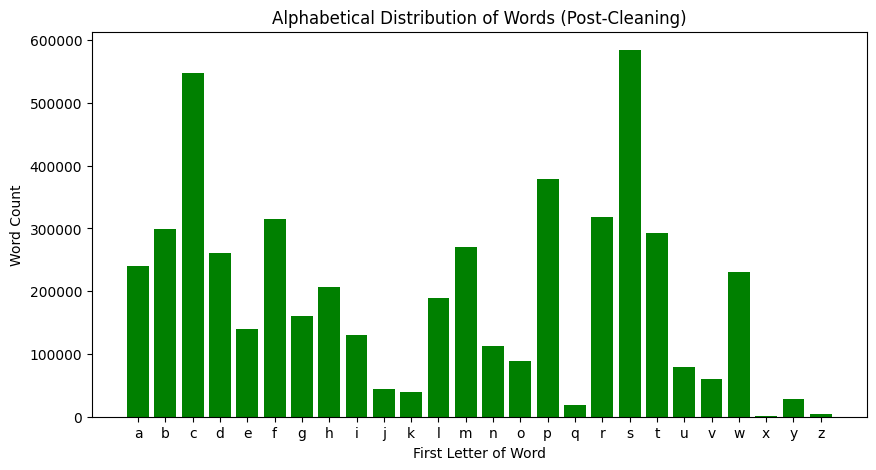

In [32]:
from collections import Counter
import matplotlib.pyplot as plt

# Flatten cleaned text into word list
word_list = ' '.join(df['cleaned_text']).split()

# Count by first letter
letter_counts = Counter(word[0].lower() for word in word_list if word and word[0].isalpha())

# Sort alphabetically
letters, counts = zip(*sorted(letter_counts.items()))

# Plot
plt.figure(figsize=(10, 5))
plt.bar(letters, counts, color="green")
plt.xlabel("First Letter of Word")
plt.ylabel("Word Count")
plt.title("Alphabetical Distribution of Words (Post-Cleaning)")
plt.show()


## Top Bigrams:


In [33]:
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=50)
X_bigrams = bigram_vectorizer.fit_transform(df['cleaned_text'])

bigram_freq = X_bigrams.sum(axis=0).A1
bigram_names = bigram_vectorizer.get_feature_names_out()
bigram_counts = dict(zip(bigram_names, bigram_freq))

top_bigrams = Counter(bigram_counts).most_common(20)
for phrase, count in top_bigrams:
    print(f"{phrase}: {count}")

country hour: 2850
man murder: 2232
man police: 2194
change climate: 2147
court face: 2067
police probe: 1995
car crash: 1775
officer police: 1773
coast gold: 1648
health mental: 1519
man missing: 1514
investigate police: 1497
rate rise: 1427
crash fatal: 1413
news rural: 1360
national news: 1354
missing police: 1276
fire house: 1166
police search: 1143
extended interview: 1141


## Top Stopwords

In [34]:
from collections import Counter

# Get stopwords
stop_words = set(stopwords.words('english'))

# Flatten cleaned text into word list
all_words = ' '.join(df['cleaned_text']).split()

# Count stopwords using lowercase matching
stopword_counts = Counter(word for word in all_words if word.lower() in stop_words)

# Get top 20 stopwords
top_stopwords = stopword_counts.most_common(20)

# Display results
print("Total words in text:", len(all_words))
print("Top stopwords:")
for word, count in top_stopwords:
    print(f"{word}: {count}")

Total words in text: 5042126
Top stopwords:


## Class Distribution

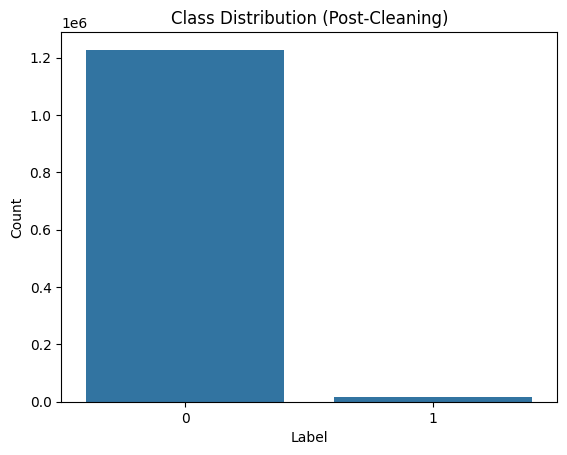

In [35]:
df['label'] = df['cleaned_text'].apply(lambda x: 1 if len(x.split()) > 7 else 0)
sns.countplot(x='label', data=df)
plt.title("Class Distribution (Post-Cleaning)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


# ***Spelling Correction System (Custom Vocabulary from ABC News Dataset)***

## Setup & Vocabulary Preparation

In [36]:
# Step 1: Create and save vocabulary from cleaned dataset
vocab = sorted(set(' '.join(df['cleaned_text']).split()))
with open('abcnews_vocab.txt', 'w', encoding='utf-8') as f:
    f.write('\n'.join(vocab))
print(f"Vocabulary size: {len(vocab)} words")

Vocabulary size: 24305 words


## Define the NewsSpellChecker Class

In [37]:
import re
from typing import List, Tuple, Dict
from nltk import word_tokenize, pos_tag

class NewsSpellChecker:
    def __init__(self, vocabulary_path: str):
        with open(vocabulary_path, 'r', encoding='utf-8') as file:
            vocabulary = file.read().splitlines()
        self.vocabulary = set(word.lower() for word in vocabulary if word.strip())
        self.word_bigrams = {word: self._get_bigrams(word) for word in self.vocabulary}

    def _get_bigrams(self, word: str) -> set:
        return {word[i:i + 2] for i in range(len(word) - 1)}

    def pos_tag_text(self, text: str) -> List[Tuple[str, str]]:
        tokens = word_tokenize(text)
        return pos_tag(tokens)

    def _levenshtein_distance(self, s1: str, s2: str) -> int:
        if len(s1) < len(s2):
            return self._levenshtein_distance(s2, s1)
        if len(s2) == 0:
            return len(s1)
        previous_row = range(len(s2) + 1)
        for i, c1 in enumerate(s1):
            current_row = [i + 1]
            for j, c2 in enumerate(s2):
                insertions = previous_row[j + 1] + 1
                deletions = current_row[j] + 1
                substitutions = previous_row[j] + (c1 != c2)
                current_row.append(min(insertions, deletions, substitutions))
            previous_row = current_row
        return previous_row[-1]

    def _bigram_similarity(self, word1: str, word2: str) -> float:
        bigrams1 = self._get_bigrams(word1)
        bigrams2 = self._get_bigrams(word2)
        if not bigrams1 or not bigrams2:
            return 0.0
        intersection = len(bigrams1.intersection(bigrams2))
        union = len(bigrams1.union(bigrams2))
        return intersection / union if union > 0 else 0.0

    def _get_word_length_similarity(self, len1: int, len2: int) -> float:
        max_len = max(len1, len2)
        length_diff = abs(len1 - len2)
        return 1 - (length_diff / max_len if max_len > 0 else 0)

    def _get_prefix_similarity(self, word1: str, word2: str, prefix_length: int = 3) -> float:
        min_length = min(len(word1), len(word2), prefix_length)
        if min_length == 0:
            return 0.0
        prefix1 = word1[:min_length]
        prefix2 = word2[:min_length]
        matching_chars = sum(1 for c1, c2 in zip(prefix1, prefix2) if c1 == c2)
        return matching_chars / min_length

    def find_best_match(self, word: str, max_suggestions: int = 5) -> List[Tuple[str, float]]:
        word = word.lower()
        if word in self.vocabulary:
            return [(word, 1.0)]
        candidates = []
        length_filtered = [
            w for w in self.vocabulary
            if abs(len(w) - len(word)) <= min(3, max(2, len(word) // 3))
        ]
        first_letter_matches = [w for w in length_filtered if w[0] == word[0]]
        search_space = first_letter_matches if len(first_letter_matches) >= 3 else length_filtered
        for candidate in search_space:
            edit_distance = self._levenshtein_distance(word, candidate)
            edit_similarity = 1 - (edit_distance / max(len(word), len(candidate)))
            bigram_sim = self._bigram_similarity(word, candidate)
            length_sim = self._get_word_length_similarity(len(word), len(candidate))
            prefix_sim = self._get_prefix_similarity(word, candidate)
            total_similarity = (
                    edit_similarity * 0.45 +
                    bigram_sim * 0.25 +
                    prefix_sim * 0.20 +
                    length_sim * 0.10
            )
            candidates.append((candidate, total_similarity))
        return sorted(candidates, key=lambda x: x[1], reverse=True)[:max_suggestions]

    def correct_text(self, text: str, confidence_threshold: float = 0.6) -> Dict[str, List[Tuple[str, float]]]:
        words = re.findall(r'\b\w+\b', text.lower())
        corrections = {}
        for word in words:
            if word not in self.vocabulary:
                suggestions = self.find_best_match(word)
                valid_suggestions = [
                    (sugg, conf) for sugg, conf in suggestions if conf >= confidence_threshold
                ]
                if valid_suggestions:
                    corrections[word] = valid_suggestions
        return corrections

## Test the Spelling Correction System

In [38]:
checker = NewsSpellChecker('abcnews_vocab.txt')
input_text = "govverment polise acttion must be taken"
corrections = checker.correct_text(input_text)

for wrong_word, suggestions in corrections.items():
    print(f"'{wrong_word}' → {[s[0] for s in suggestions]}")

'govverment' → ['government', 'governmental', 'governing', 'governess']
'polise' → ['polish', 'polite', 'police', 'polished', 'poise']
'acttion' → ['action', 'acton', 'acting', 'active', 'auction']
'be' → ['bel', 'beg', 'ber', 'bet', 'bee']


## Generate Corrected Sentence (Spelling Correction Output)

In [39]:
spell_checker = NewsSpellChecker("abcnews_vocab.txt")

# Sample input based on ABC News headline style
test_text = "Goverment annouced new polcy to strenghten educattion secttor after critcal report."

print("Sample sentence:")
print(test_text)

# Apply spelling Corrections
corrections = spell_checker.correct_text(test_text, confidence_threshold=0.70)

# Print Correction Suggestions
print("\nCorrections:")
for word, suggestions in corrections.items():
    print(f"{word} → {suggestions}")

# Generate corrected sentence
words = re.findall(r'\b\w+\b', test_text)
corrected_words = []

for word in words:
    lw = word.lower()
    if lw in corrections and corrections[lw][0][1] >= 0.60:
        corrected_words.append(corrections[lw][0][0])
    else:
        corrected_words.append(word)

corrected_sentence = " ".join(corrected_words)
corrected_sentence = re.sub(r'[^a-zA-Z0-9\s]', '', corrected_sentence).strip()

print("\nCorrected Sentence:")
print(corrected_sentence)

Sample sentence:
Goverment annouced new polcy to strenghten educattion secttor after critcal report.

Corrections:
goverment → [('government', 0.87), ('governmental', 0.7583333333333333)]
annouced → [('announce', 0.7763888888888889), ('announcer', 0.763888888888889)]
polcy → [('policy', 0.7833333333333333), ('poly', 0.7400000000000002)]
strenghten → [('straighten', 0.7963636363636364), ('strengthen', 0.7736363636363637), ('strength', 0.72)]
educattion → [('education', 0.9172222222222223), ('educational', 0.7999999999999999), ('educative', 0.7413636363636363), ('educator', 0.7086363636363637)]
secttor → [('sector', 0.8797619047619049), ('section', 0.7047619047619048)]
critcal → [('critical', 0.8375)]

Corrected Sentence:
government announce new policy to straighten education sector after critical report


##  POS Tagging

In [40]:
# Step 3: POS tagging
tags = spell_checker.pos_tag_text(corrected_sentence)

print("\nPart of Speech Tags:")
for word, tag in tags:
    print(f"{word}: {tag}")


Part of Speech Tags:
government: NN
announce: VB
new: JJ
policy: NN
to: TO
straighten: VB
education: NN
sector: NN
after: IN
critical: JJ
report: NN


## Grammar Correction Check

In [41]:
# Upgrade Java version in Colab (to Java 17)
!apt-get install -y openjdk-17-jre
!update-alternatives --install /usr/bin/java java /usr/lib/jvm/java-17-openjdk-amd64/bin/java 1
!update-alternatives --set java /usr/lib/jvm/java-17-openjdk-amd64/bin/java

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libxtst6 libxxf86dga1 openjdk-17-jre-headless
  x11-utils
Suggested packages:
  libnss-mdns fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  | fonts-wqy-zenhei fonts-indic mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libxtst6 libxxf86dga1 openjdk-17-jre
  openjdk-17-jre-headless x11-utils
0 upgraded, 9 newly installed, 0 to remove and 34 not upgraded.
Need to get 52.0 MB of archives.
After this operation, 205 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-dejavu-core all 2.37-2build1 [1,041 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-dejavu-extra all 2.37-2build1 [2,04

In [42]:
!pip install language_tool_python --upgrade

In [43]:
import language_tool_python

In [44]:
import language_tool_python

def correct_grammar(text):
    # Use the public API server (no local JAR or Java needed)
    tool = language_tool_python.LanguageToolPublicAPI('en-US')
    matches = tool.check(text)
    return language_tool_python.utils.correct(text, matches)


In [45]:
# Example test sentence with grammar mistakes
grammar_input = "The people was ansgry about the goverment decission and prottest hapen on street."

# Run grammar correction
final_grammar_corrected = correct_grammar(grammar_input)

# Show before and after
print("Original Sentence:")
print(grammar_input)

print("\nGrammar-Corrected Sentence:")
print(final_grammar_corrected)


Original Sentence:
The people was ansgry about the goverment decission and prottest hapen on street.

Grammar-Corrected Sentence:
The people was angry about the government decision and protest happen on street.


## Vocabulary Browser + Word Search

In [46]:
# Display total words
print(f"Total unique words in corpus: {len(vocab)}")

# Sort and display first 20 words
sorted_vocab = sorted(vocab)
print("Sample vocabulary list:")
print(sorted_vocab[:20])

# Search word
search_word = "education"
if search_word in vocab:
    print(f"'{search_word}' exists in vocabulary ")
else:
    print(f"'{search_word}' not found ")

Total unique words in corpus: 24305
Sample vocabulary list:
['aa', 'aam', 'aardvark', 'aba', 'aback', 'abacus', 'abalone', 'abandon', 'abandoned', 'abandonment', 'abate', 'abatement', 'abattoir', 'abb', 'abbas', 'abbey', 'abbot', 'abbreviation', 'abdicate', 'abdication']
'education' exists in vocabulary 


# **GUI**

### Import Libraries and Setup

In [61]:
import re
import gradio as gr
import nltk
import language_tool_python
from typing import List, Tuple, Dict

nltk.download('punkt', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)

True

###  Load Vocabulary and Define Custom Spell Checker

In [62]:
with open("abcnews_vocab.txt", 'r', encoding='utf-8') as f:
    vocab = set(w.strip().lower() for w in f if w.strip())

In [63]:
class NewsSpellChecker:
    def __init__(self, vocabulary: set):
        self.vocab = vocabulary

    def _levenshtein(self, s1, s2):
        if len(s1) < len(s2):
            return self._levenshtein(s2, s1)
        if len(s2) == 0:
            return len(s1)
        prev = range(len(s2) + 1)
        for i, c1 in enumerate(s1):
            curr = [i + 1]
            for j, c2 in enumerate(s2):
                ins, delt, sub = prev[j+1] + 1, curr[j] + 1, prev[j] + (c1 != c2)
                curr.append(min(ins, delt, sub))
            prev = curr
        return prev[-1]

    def _similarity(self, word1, word2):
        dist = self._levenshtein(word1, word2)
        return 1 - dist / max(len(word1), len(word2))

    def get_suggestions(self, text: str, threshold: float = 0.85) -> Tuple[Dict[str, List[str]], str]:
        words = re.findall(r'\b\w+\b', text.lower())
        suggestions = {}
        for word in words:
            if word in self.vocab or len(word) <= 3:
                continue  # Skip known or very short words
            sims = [(v, self._similarity(word, v)) for v in self.vocab]
            sims = [(v, s) for v, s in sims if s >= threshold]
            sims.sort(key=lambda x: x[1], reverse=True)
            if sims:
                suggestions[word] = [s[0] for s in sims[:3]]
        return suggestions, text

###  Define Grammar Correction Function

In [64]:
spell_checker = NewsSpellChecker(vocab)
tool = language_tool_python.LanguageToolPublicAPI('en-US')

def correct_grammar(text):
    matches = tool.check(text)
    return language_tool_python.utils.correct(text, matches)

### Combine Spelling and Grammar Logic

In [70]:
with gr.Blocks() as app:
    gr.Markdown("## 🧠 Spelling & Grammar Correction Tool")

    input_text = gr.Textbox(label="Enter Text", lines=4)

    auto_suggestions = gr.Textbox(label="Auto-Corrected Suggestions", lines=6)
    auto_corrected_text = gr.Textbox(label="Auto-Corrected Sentence", lines=2)
    auto_grammar_text = gr.Textbox(label="Grammar-Corrected Sentence (Auto)", lines=2)

    # ✅ This triggers automatically when text changes
    input_text.change(
        fn=spell_and_grammar,
        inputs=input_text,
        outputs=[auto_suggestions, auto_corrected_text, auto_grammar_text]
    )

### Launch the GUI Application

In [71]:
# === Step 6: Launch the App ===
app.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://494b382d5ae0ee88e8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
